In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import scipy.stats as ss

from collections import Counter
import math

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Исследование данных

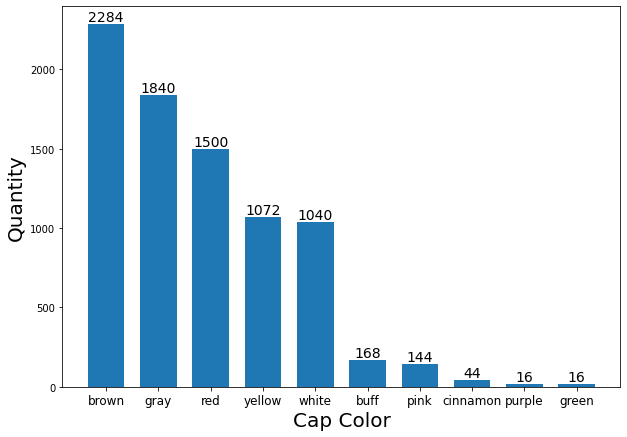

In [6]:
cap_colors = df['cap-color'].value_counts()
m_height = cap_colors.values.tolist() 
cap_colors.axes 
cap_color_labels = cap_colors.axes[0].tolist() 

ind = np.arange(10)  
width = 0.7     
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width)

ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_xticks(ind) 
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'), fontsize = 12)

def autolabel(rects,fontsize=14):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show()

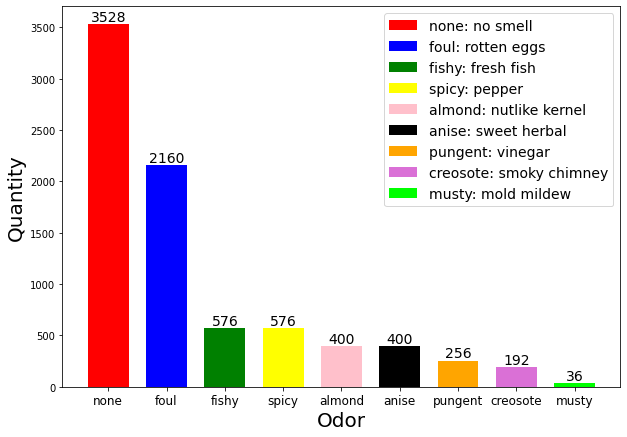

In [7]:
odors = df['odor'].value_counts()
odor_height = odors.values.tolist() 
odor_labels = odors.axes[0].tolist() 

width = 0.7 
ind = np.arange(9) 
colors = ['red','blue','green','yellow','pink','black','orange','orchid','lime']

fig, ax = plt.subplots(figsize=(10,7))
odor_bars = ax.bar(ind, odor_height , width, color=colors)

ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend(odor_bars, ['none: no smell','foul: rotten eggs', 'fishy: fresh fish','spicy: pepper',
                      'almond: nutlike kernel', 'anise: sweet herbal', 'pungent: vinegar',
                     'creosote: smoky chimney', 'musty: mold mildew'],fontsize=14)
autolabel(odor_bars)        
plt.show() 

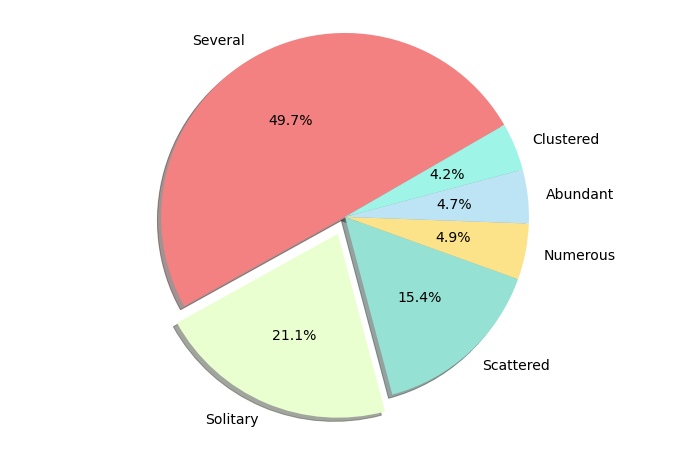

In [8]:
populations = df['population'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list

pop_labels = 'Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6']
explode = (0, 0.1, 0, 0, 0, 0)  # explode 1st slice
fig = plt.figure(figsize=(12,8))

patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=30)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

#Modelling




In [16]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import classification_report

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
import models

In [12]:
y = df['class'].map({'p' : 1, 'e' : 0}).to_numpy()
X = pd.get_dummies(df[['odor', 'spore-print-color', 'gill-color', 'ring-type']]).to_numpy()

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

# Логистическая регрессия

In [17]:
%%time
model = models.LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8822    1.0000    0.9374      1258
           1     1.0000    0.8576    0.9234      1180

    accuracy                         0.9311      2438
   macro avg     0.9411    0.9288    0.9304      2438
weighted avg     0.9392    0.9311    0.9306      2438

CPU times: user 1.11 s, sys: 561 ms, total: 1.67 s
Wall time: 872 ms


In [18]:
%%time
model = LogisticRegression(random_state=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9874    1.0000    0.9937      1258
           1     1.0000    0.9864    0.9932      1180

    accuracy                         0.9934      2438
   macro avg     0.9937    0.9932    0.9934      2438
weighted avg     0.9935    0.9934    0.9934      2438

CPU times: user 95.6 ms, sys: 51.8 ms, total: 147 ms
Wall time: 86.6 ms


# KNN

In [19]:
%%time
model = models.KNN(n_neighbors=3)

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9882    1.0000    0.9941      1258
           1     1.0000    0.9873    0.9936      1180

    accuracy                         0.9938      2438
   macro avg     0.9941    0.9936    0.9938      2438
weighted avg     0.9939    0.9938    0.9938      2438

CPU times: user 1.47 s, sys: 1.35 ms, total: 1.47 s
Wall time: 1.48 s


In [20]:
%%time
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9967    0.9714    0.9839      1258
           1     0.9703    0.9966    0.9833      1180

    accuracy                         0.9836      2438
   macro avg     0.9835    0.9840    0.9836      2438
weighted avg     0.9839    0.9836    0.9836      2438

CPU times: user 659 ms, sys: 3.42 ms, total: 662 ms
Wall time: 664 ms


# Решающее дерево

In [21]:
%%time
model = models.DecisionTree(max_depth=4)

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9882    1.0000    0.9941      1258
           1     1.0000    0.9873    0.9936      1180

    accuracy                         0.9938      2438
   macro avg     0.9941    0.9936    0.9938      2438
weighted avg     0.9939    0.9938    0.9938      2438

CPU times: user 4.65 s, sys: 9.2 ms, total: 4.66 s
Wall time: 4.68 s


In [22]:
%%time
model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9882    1.0000    0.9941      1258
           1     1.0000    0.9873    0.9936      1180

    accuracy                         0.9938      2438
   macro avg     0.9941    0.9936    0.9938      2438
weighted avg     0.9939    0.9938    0.9938      2438

CPU times: user 12.1 ms, sys: 856 µs, total: 13 ms
Wall time: 21.6 ms


# Случайный лес

In [23]:
model = models.RandomForest()

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8305    0.9738    0.8965      1258
           1     0.9657    0.7881    0.8679      1180

    accuracy                         0.8839      2438
   macro avg     0.8981    0.8810    0.8822      2438
weighted avg     0.8960    0.8839    0.8827      2438



In [24]:
model = RandomForestClassifier(max_depth=4, n_estimators=25, random_state=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8822    1.0000    0.9374      1258
           1     1.0000    0.8576    0.9234      1180

    accuracy                         0.9311      2438
   macro avg     0.9411    0.9288    0.9304      2438
weighted avg     0.9392    0.9311    0.9306      2438

